# Gibbs Sampling

The Gibbs Sampling Algorithm is a particular instance of the Metropolis-Hastings Algorithm wherby every step is accepted.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from numpy.random import randn, seed

In [2]:
%config InlineBackend.figure_format = "retina"

In this example we consider a distribution of the form

$$
    p(x,y) \propto \exp(-x^2y^2)
$$

To perform Gibbs Sampling over $p$.

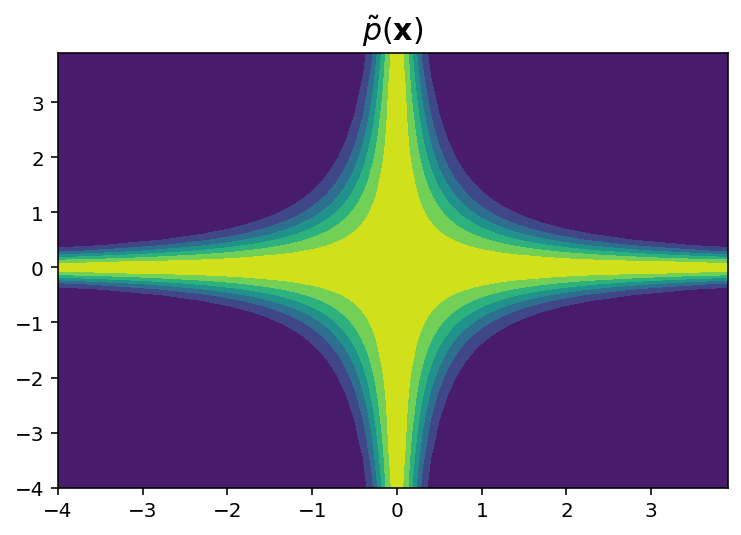

In [3]:
def p(x):
    return np.exp(-x[0] ** 2 * x[1] ** 2)

xmin, xmax = -4, 4
ymin, ymax = -4, 4
X = np.mgrid[xmin:xmax:0.1, ymin:ymax:0.1]
Z = np.apply_along_axis(p, 0, X)

plt.contourf(*X, Z)
plt.title(r"$\tilde p({\bf x})$", fontsize=15);

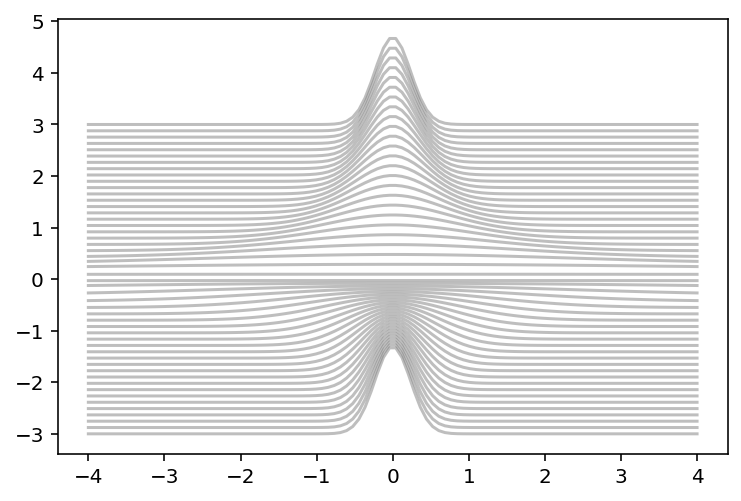

In [4]:
vrange = np.linspace(-4, 4, 100)

yvals = np.linspace(-3, 3, 50)
for ix, y in enumerate(yvals):
    x_giv_y = norm(loc=0, scale=np.sqrt(1 / (2 * y ** 2)))
    plt.plot(vrange, x_giv_y.pdf(vrange) + y, c="tab:gray", alpha=0.5)

In [5]:
x, y = 0.01, 0.01
samples = [(x, y)]

seed(31)
for _ in range(1_000):
    sigma_x = np.sqrt(1 / (2 * y ** 2))
    x_giv_y = norm(loc=0, scale=sigma_x)
    x = x_giv_y.rvs()
    samples.append([x, y])
    
    sigma_y = np.sqrt(1 / (2 * x ** 2))
    y_giv_x = norm(loc=0, scale=sigma_y)
    y = y_giv_x.rvs()
    samples.append([x, y])
    
samples = np.r_[samples]

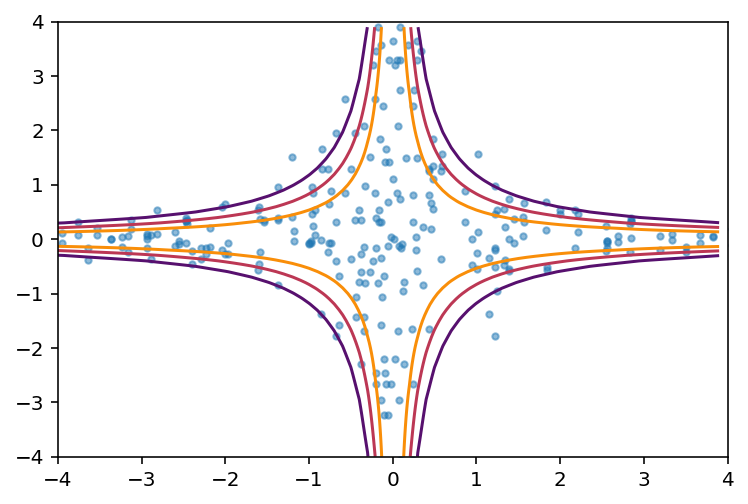

In [6]:
plt.contour(*X, Z, levels=3, cmap="inferno")
plt.scatter(*samples.T, s=10, alpha=0.5)
plt.ylim(-4, 4)
plt.xlim(-4, 4);

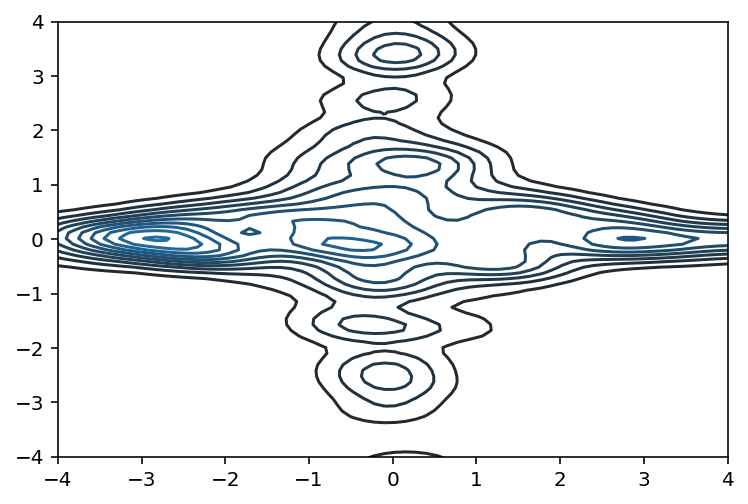

In [7]:
samples_normed = samples[np.abs(samples).sum(axis=1) < 5]
sns.kdeplot(*samples_normed.T)
plt.ylim(-4, 4)
plt.xlim(-4, 4);

In [8]:
# over-relaxation
x, y = -1, -1
samples = [(x, y)]

seed(31)
nu = norm(loc=0, scale=1)
alpha = 0.5
for _ in range(500):
    sigma_x = np.sqrt(1 / (2 * y ** 2))
    x_giv_y = norm(loc=0, scale=sigma_x)
    x = x_giv_y.rvs()
    # x' transformation
    x = alpha * x + sigma_x * np.sqrt(1 - alpha ** 2) * nu.rvs()
    samples.append([x, y])
    
    sigma_y = np.sqrt(1 / (2 * x ** 2))
    y_giv_x = norm(loc=0, scale=sigma_y)
    y = y_giv_x.rvs()
    # y' transformation
    y = alpha * y + sigma_y * np.sqrt(1 - alpha ** 2) * nu.rvs()
    samples.append([x, y])
    
samples = np.r_[samples]

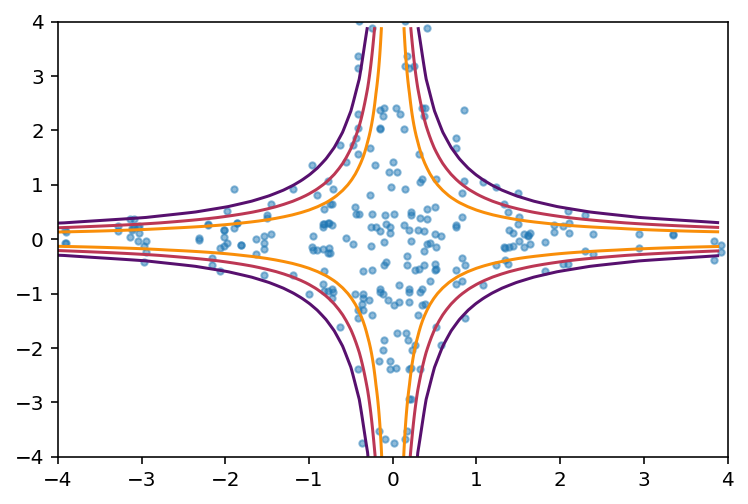

In [9]:
plt.contour(*X, Z, levels=3, cmap="inferno")
plt.scatter(*samples.T, s=10, alpha=0.5)
plt.ylim(-4, 4)
plt.xlim(-4, 4);